In [2]:
%pip install ipykernel scipy 

133.15s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Task 1.1

In [3]:
# Define the parameter N (variant number)
N = 3  # Example: Variant 4

# Calculate annual incomes
incomes = [
    50000 + 100 * N,
    100000 + 100 * N,
    300000 + 100 * N,
    200000 + 100 * N
]

# Calculate turnover rate
turnover_rate = (10 + 0.1 * N) / 100  # Convert to decimal

# Define a function to calculate NPV given initial cost B
def calculate_npv(B, incomes, rate):
    npv = sum(income / ((1 + rate) ** (year + 1)) for year, income in enumerate(incomes))
    return npv + B  # Include initial investment

# Use numerical method to find the B for which NPV = 0
from scipy.optimize import fsolve

# Initial guess for B
initial_B = -100000 + 100 * N

# Solve for B
optimal_B = fsolve(lambda B: calculate_npv(B, incomes, turnover_rate), initial_B)[0]
optimal_B


np.float64(-487154.31167671806)

In [4]:
%pip install numpy matplotlib pandas

139.67s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Task 1.2

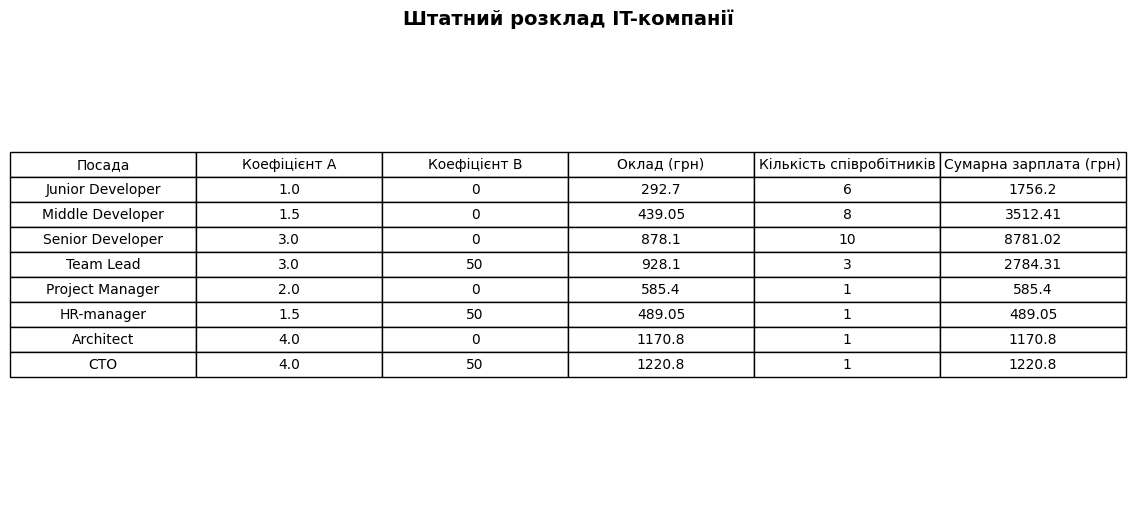

             Посада  Коефіцієнт A  Коефіцієнт B  Оклад (грн)  \
0  Junior Developer           1.0             0   292.700730   
1  Middle Developer           1.5             0   439.051095   
2  Senior Developer           3.0             0   878.102190   
3         Team Lead           3.0            50   928.102190   
4   Project Manager           2.0             0   585.401460   
5        HR-manager           1.5            50   489.051095   
6         Architect           4.0             0  1170.802920   
7               CTO           4.0            50  1220.802920   

   Кількість співробітників  Сумарна зарплата (грн)  
0                         6             1756.204380  
1                         8             3512.408759  
2                        10             8781.021898  
3                         3             2784.306569  
4                         1              585.401460  
5                         1              489.051095  
6                         1             1170.

In [47]:
# Re-import necessary packages after code reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Variant number
N = 3
# Position counts
positions = {
    "Junior Developer": 6,
    "Middle Developer": 8,
    "Senior Developer": 10,
    "Team Lead": 3,
    "Project Manager": 1,
    "HR-manager": 1,
    "Architect": 1,
    "CTO": 1
}

# Coefficients a_i and b_i
coefficients = {
    "Junior Developer": (1, 0),
    "Middle Developer": (1.5, 0),
    "Senior Developer": (3, 0),
    "Team Lead": (3, 50),
    "Project Manager": (2, 0),
    "HR-manager": (1.5, 50),
    "Architect": (4, 0),
    "CTO": (4, 50)
}

# Target salary fund
target_salary_fund = float(20000 + 100 * N)

# Function to calculate total salary
def total_salary(S_JD):
    total = 0.0
    for role in positions:
        n_i = positions[role]
        a_i, b_i = coefficients[role]
        salary = n_i * (a_i * S_JD + b_i)
        total += salary
    return total

# Difference function
def salary_difference(S_JD):
    return total_salary(S_JD) - target_salary_fund

# Solve for S_JD
initial_guess = 100.0
S_JD_optimal = fsolve(salary_difference, initial_guess)[0]

# Prepare table data
roles = list(positions.keys())
table_data = {
    "Посада": roles,
    "Коефіцієнт A": [coefficients[role][0] for role in roles],
    "Коефіцієнт B": [coefficients[role][1] for role in roles],
    "Оклад (грн)": [coefficients[role][0] * S_JD_optimal + coefficients[role][1] for role in roles],
    "Кількість співробітників": [positions[role] for role in roles],
}

# Add "Сумарна зарплата"
table_data["Сумарна зарплата (грн)"] = [
    table_data["Оклад (грн)"][i] * table_data["Кількість співробітників"][i]
    for i in range(len(roles))
]

# Create DataFrame
df = pd.DataFrame(table_data)

# Display the table using matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
table = ax.table(cellText=df.round(2).values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
plt.title("Штатний розклад IT-компанії", fontsize=14, fontweight='bold')
plt.show()

print(f'{df}\nPayroll in table:{sum(table_data["Сумарна зарплата (грн)"][0:])}')  # Total salary excluding the last row


Task 1.3

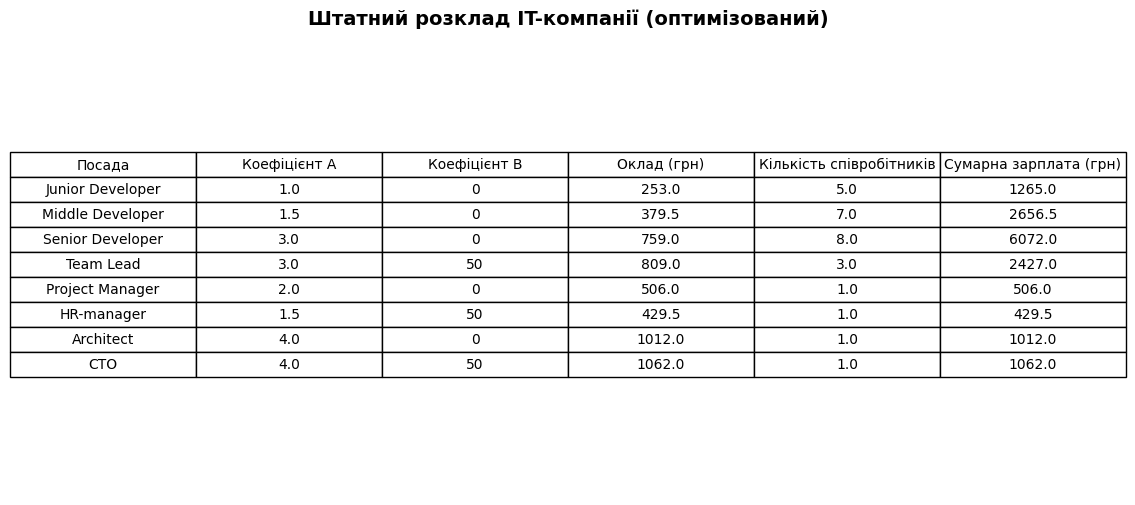

             Посада  Коефіцієнт A  Коефіцієнт B  Оклад (грн)  \
0  Junior Developer           1.0             0        253.0   
1  Middle Developer           1.5             0        379.5   
2  Senior Developer           3.0             0        759.0   
3         Team Lead           3.0            50        809.0   
4   Project Manager           2.0             0        506.0   
5        HR-manager           1.5            50        429.5   
6         Architect           4.0             0       1012.0   
7               CTO           4.0            50       1062.0   

   Кількість співробітників  Сумарна зарплата (грн)  
0                       5.0                  1265.0  
1                       7.0                  2656.5  
2                       8.0                  6072.0  
3                       3.0                  2427.0  
4                       1.0                   506.0  
5                       1.0                   429.5  
6                       1.0                  

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the previous result
best_S_JD = 253.0
best_solution = [5., 7., 8., 3., 1., 1., 1., 1.]

roles = [
    "Junior Developer", "Middle Developer", "Senior Developer", "Team Lead",
    "Project Manager", "HR-manager", "Architect", "CTO"
]

a_i = [1, 1.5, 3, 3, 2, 1.5, 4, 4]
b_i = [0, 0, 0, 50, 0, 50, 0, 50]

# Build table data
salaries = [a * best_S_JD + b for a, b in zip(a_i, b_i)]
employees = best_solution
total_salaries = [s * n for s, n in zip(salaries, employees)]

table_data = {
    "Посада": roles,
    "Коефіцієнт A": a_i,
    "Коефіцієнт B": b_i,
    "Оклад (грн)": salaries,
    "Кількість співробітників": employees,
    "Сумарна зарплата (грн)": total_salaries
}

df = pd.DataFrame(table_data)
# Plot the table
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
table = ax.table(cellText=df.round(2).values,
                 colLabels=df.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
plt.title("Штатний розклад IT-компанії (оптимізований)", fontsize=14, fontweight='bold')
plt.show()

print(df)  # Display the DataFrame

print(f'Payroll in table:{sum(df["Сумарна зарплата (грн)"])}')  # Total salary excluding the last row

Task 1.4

In [49]:
# Re-import libraries and redefine necessary code after environment reset

import numpy as np
from scipy.optimize import minimize
import pandas as pd

# Variant number
N = 3

# Constants
seasonal_factor = 0.9
wage_costs = 8000 + 10 * N
product_price = 40 + 0.1 * N
product_cost_price = 25 + 0.1 * N

# Formula: SP = 35 · Is · (Ac + 3000)**0.5
def sales_volume(ac):
    return 35 * seasonal_factor *  (ac + 3000) ** 0.5

# Revenue from turnover: RT = SP · PP
def revenue(ac):
    return sales_volume(ac) * product_price

# Cost of goods sold: CGS = SP · CP
def cost_of_goods_sold(ac):
    return sales_volume(ac) * product_cost_price

# Gross profit: GP = RT - CGS
def gross_profit(ac):
    return revenue(ac) - cost_of_goods_sold(ac)

# Overhead costs: OC = 0.15 · RT
def overhead_costs(ac):
    return 0.15 * revenue(ac)

# Gross expenses: GE = WC + Ac + OC
def gross_expenses(ac):
    return wage_costs + ac + overhead_costs(ac)

# Profit from product sales: PPS = GP - GE
def profit_from_sales(ac):
    return gross_profit(ac) - gross_expenses(ac)

# Objective: maximize profit => minimize negative profit
objective = lambda ac: -profit_from_sales(ac[0])

# Initial advertising cost guess
initial_guess = [10000 + 10 * N]

# Bounds to keep advertising cost positive
bounds = [(1000, 100000)]

# Use solver to find optimal advertising cost
result = minimize(objective, initial_guess, bounds=bounds)
optimal_ad_cost = result.x[0]
optimal_profit = profit_from_sales(optimal_ad_cost)
optimal_revenue = revenue(optimal_ad_cost)
optimal_profitability = optimal_profit / optimal_revenue

# Compute results for 90%, 80%, 70% of optimal advertising cost
ad_costs_variants = [0.9 * optimal_ad_cost, 0.8 * optimal_ad_cost, 0.7 * optimal_ad_cost]
profit_variants = [profit_from_sales(ac) for ac in ad_costs_variants]
profitability_variants = [profit_from_sales(ac) / revenue(ac) for ac in ad_costs_variants]

# Prepare result table
df = pd.DataFrame({
    "Advertising Cost": [10000 + 10 * N, optimal_ad_cost] + ad_costs_variants,
    "Profit from Sales": [profit_from_sales(10000 + 10 * N), optimal_profit] + profit_variants,
    "Profitability (%)": [profit_from_sales(10000 + 10 * N) / revenue(10000 + 10 * N) * 100,
                          optimal_profitability * 100] + [p * 100 for p in profitability_variants]
})

# Display the DataFrame
print(df)


   Advertising Cost  Profit from Sales  Profitability (%)
0      10030.000000       14139.442458           9.757633
1      16892.598084       14862.634202           8.301077
2      15203.338276       14825.161409           8.655822
3      13514.078467       14705.529648           9.014422
4      11824.818659       14490.760078           9.375207


Task 1.5

In [50]:
from scipy.optimize import linprog
import pandas as pd

# Номер варіанту
N = 3
K = N

# Норми витрат сировини на 1 т продукції
consumption = {
    'Resource1': [0.4 + 0.01 * N] * 3,  # для A, B, C
    'Resource2': [0.4 + 0.01 * N, 0.2 + 0.01 * N, 0.4 + 0.01 * N],
    'Resource3': [0.2 + 0.01 * N, 0.4 + 0.01 * N, 0.2 + 0.01 * N]
}

# Запаси сировини
stocks = {
    'Resource1': 16.5 + K,
    'Resource2': 15 + K,
    'Resource3': 12 + K
}

# Ціни на продукцію (виручка)
prices = [300 + K, 380 + K, 300 + K]

# Лінійна цільова функція (мінімізація, тому -prices)
c = [-p for p in prices]

# Матриця обмежень (ресурси)
A_ub = [
    [consumption['Resource1'][0], consumption['Resource1'][1], consumption['Resource1'][2]],
    [consumption['Resource2'][0], consumption['Resource2'][1], consumption['Resource2'][2]],
    [consumption['Resource3'][0], consumption['Resource3'][1], consumption['Resource3'][2]]
]
b_ub = [stocks['Resource1'], stocks['Resource2'], stocks['Resource3']]

# Обмеження змінних (x1, x2, x3 ≥ 0)
bounds = [(0, None)] * 3

# Розв’язок
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Формуємо таблицю результатів
result_df = pd.DataFrame({
    'Product': ['A', 'B', 'C'],
    'Production Plan (tons)': res.x,
    'Unit Price (UAH)': prices,
    'Revenue (UAH)': res.x * prices
})
result_df.loc['Total'] = ['—', result_df['Production Plan (tons)'].sum(), '—', result_df['Revenue (UAH)'].sum()]

print(result_df)


      Product  Production Plan (tons) Unit Price (UAH)  Revenue (UAH)
0           A               22.500000              303    6817.500000
1           B               22.848837              383    8751.104651
2           C                0.000000              303       0.000000
Total       —               45.348837                —   15568.604651


In [43]:
# Access 'ineqlin' as a dictionary to safely extract sensitivity details

# Solve LP again
res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Extract sensitivity data from 'ineqlin' if available
ineqlin = res.get('ineqlin', {})
slacks = ineqlin.get('slack', [None] * len(b_ub))
shadow_prices = ineqlin.get('marginals', [None] * len(b_ub))

sensitivity_df = pd.DataFrame({
    'Constraint': ['Resource 1', 'Resource 2', 'Resource 3'],
    'Slack (Unused Resource)': slacks,
    'Shadow Price (UAH per unit)': shadow_prices
})



print(sensitivity_df)

   Constraint Slack (Unused Resource)  Shadow Price (UAH per unit)
0  Resource 1                    None                  -490.697674
1  Resource 2                    None                    -0.000000
2  Resource 3                    None                  -400.000000
